# Dataset : Supermart Grocery Sales - Retail Analytics Dataset
size: 9578 rows, 14 columns
source: Kaggle (https://www.kaggle.com/datasets/itssuru/loan-data)

- credit.policy
Indicates whether the borrower meets LendingClub’s credit rules.

1 → Meets credit policy

0 → Does not meet credit policy

- purpose
The reason why the loan was taken (e.g., credit card payment, debt consolidation, education, etc.).

- int.rate
The interest rate charged on the loan.
Higher values mean the borrower is considered more risky.

- installment
The monthly amount the borrower has to pay if the loan is approved.

- log.annual.inc
The natural logarithm of the borrower’s yearly income.

- dti (Debt-to-Income Ratio)
Shows how much of the borrower’s income is used to pay debts.
Higher values indicate higher financial burden.

- fico
The borrower’s credit score, which reflects creditworthiness.
Higher scores indicate lower risk.

- days.with.cr.line
Number of days the borrower has had a credit history.

- revol.bal
The unpaid balance on revolving credit (like credit cards).

- revol.util
Percentage of available credit currently being used.

- inq.last.6mths
Number of times the borrower’s credit was checked in the last 6 months.

- delinq.2yrs
Number of times the borrower missed payments by 30+ days in the last 2 years.

- pub.rec
Number of negative public records such as bankruptcy or tax liens.

In [3]:
import pandas as pd
import numpy as np

In [4]:


import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
df = pd.read_csv('/home/amma/Downloads/loan_data.csv')

In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [8]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [9]:
df.shape

(9578, 14)

In [10]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Check for duplicated values

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
def clean_text(text):
    text = text.lower()                       # lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # remove special characters
    tokens = text.split()                     # tokenization
    return " ".join(tokens)

df["purpose_cleaned"] = df["purpose"].apply(clean_text)

df[["purpose", "purpose_cleaned"]].head()


,purpose,purpose_cleaned
0,debt_consolidation,debtconsolidation
1,credit_card,creditcard
2,debt_consolidation,debtconsolidation
3,debt_consolidation,debtconsolidation
4,credit_card,creditcard


# Rename Columns

In [16]:
df.rename(columns={
    "credit.policy": "credit_policy",
    "int.rate": "interest_rate",
    "log.annual.inc": "log_annual_income",
    "dti": "debt_to_income_ratio",
    "days.with.cr.line": "days_with_credit_line",
    "revol.bal": "revolving_balance",
    "revol.util": "revolving_utilization",
    "inq.last.6mths": "inquiries_last_6_months",
    "delinq.2yrs": "delinquencies_2_years",
    "pub.rec": "public_records",
    "not.fully.paid": "loan_default"
}, inplace=True)



# Feature Engineering

In [17]:
# Convert interest rate to percentage
df["interest_rate_pct"] = df["interest_rate"] * 100
df["interest_rate_pct"]

0       11.89
1       10.71
2       13.57
3       10.08
4       14.26
        ...  
9573    14.61
9574    12.53
9575    10.71
9576    16.00
9577    13.92
Name: interest_rate_pct, Length: 9578, dtype: float64

In [18]:
# Create income category
df["income_level"] = pd.cut(
    df["log_annual_income"],
    bins=3,
    labels=["Low", "Medium", "High"]
)

df.head()

,credit_policy,purpose,interest_rate,installment,log_annual_income,debt_to_income_ratio,fico,days_with_credit_line,revolving_balance,revolving_utilization,inquiries_last_6_months,delinquencies_2_years,public_records,loan_default,purpose_cleaned,interest_rate_pct,income_level
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,debtconsolidation,11.89,Medium
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,creditcard,10.71,Medium
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,debtconsolidation,13.57,Medium
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,debtconsolidation,10.08,Medium
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,creditcard,14.26,Medium


In [23]:
df.to_csv("cleaned_loan_dataset.csv", index=False)


# Visualization

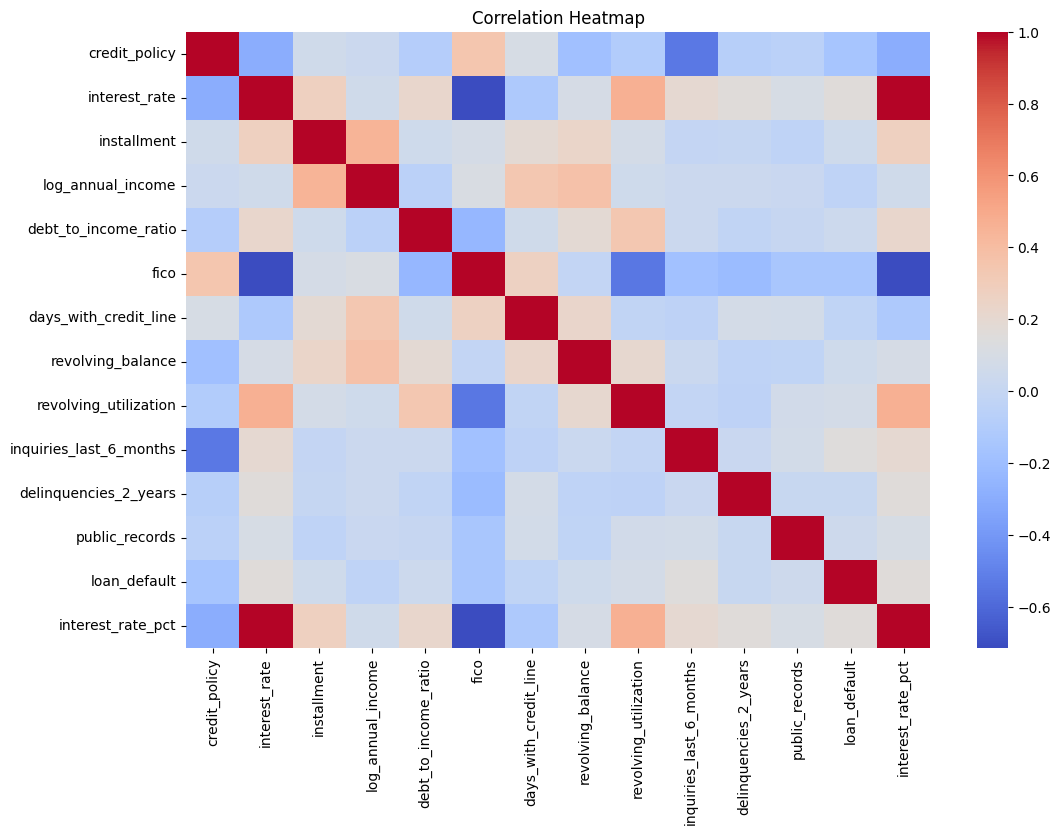

In [20]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=np.number).corr()

sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


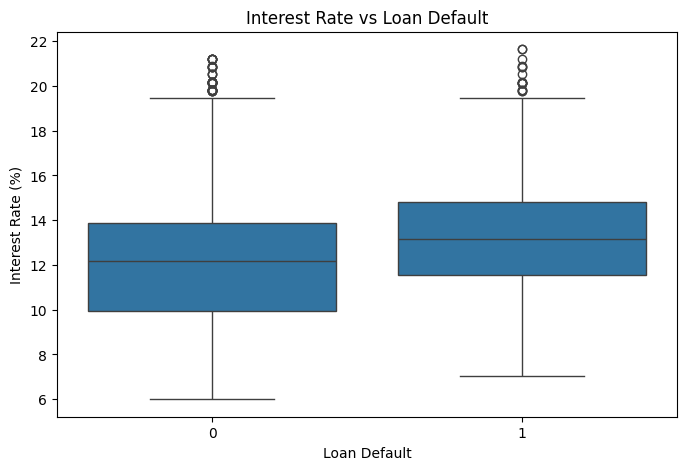

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_default", y="interest_rate_pct", data=df)
plt.title("Interest Rate vs Loan Default")
plt.xlabel("Loan Default")
plt.ylabel("Interest Rate (%)")
plt.show()


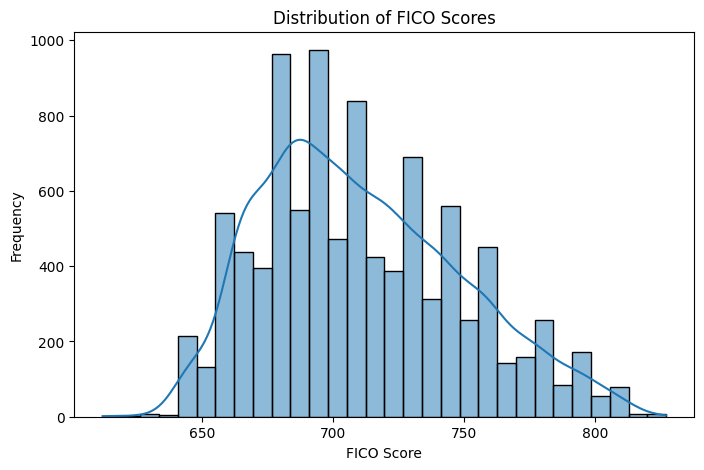

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df["fico"], bins=30, kde=True)
plt.title("Distribution of FICO Scores")
plt.xlabel("FICO Score")
plt.ylabel("Frequency")
plt.show()
